# Lecture 7 - Eigen Images

<br><br>

Earlier it was noted that humans identify faces by their deviations from the average face. 

We will explore one method of describing facial differences within a population. 

This method has been used for face recognition systems but does not include all of the important features of a face. 

Just as in the computation of the average face, the face images will be warped to a single grid which does remove shape information from the image. 

Shape is important, and so, necessarily the method shown here should be considered as only one tool in a suite available for face recognition.

The method of eigenimages is based on PCA, and it creates a new space to represent a set of images. 

Advantages of this new space include a significantly reduced dimensionality and an optimal view of the first order data inherent in the data set.

We will review the foundations required of the eigenimage method as well as the generation and use of eigenimages coupled with examples.

<br><br><br><br><br><br><br><br><br><br><br><br>


## Eigenimages

Eigenimages are created in a process similar to PCA, but with a modification. As a reminder, the traditional PCA process is:

1. Warp images to a single grid
2. Compute the covariance matrix of the images
3. Compute the eigenimages from the covariance matrix
4. Downselect the eigenimages to use

<b>Step 2</b>, though, is potentially an untenable step. The size of the covariance matrix is prohibitively large. 

If the images were $ 256 \times 256$, which is a small image, then the covariance matrix would be $65,536 \times 65,536$.

Using single precision floats, this array would consume 16 GB. 

Thus, this method needs to be modified in order to calculate the eigenimages.

Formally, the process starts with a set of images, ${\bf a}_i[\vec x]; i=1,\ldots,P$.

Every image is warped to a single grid, $G$

$\left\{ {\bf b}[\vec x] \right\} = \left\{ W_G {\bf a}[\vec x] \right\}$

The average images is computed

${\bf \bar b}[\vec x] = \frac{1}{N} \sum  \left\{ {\bf b}[\vec x] \right\}$

and subtracted from each image
 
$\left\{ {\bf c}[\vec x] \right\} = \left\{ {\bf b}[\vec x] - {\bf \bar b}[\vec x] \right\}$

The notation $\left\{ {\bf b}[\vec x] - {\bf \bar b}[\vec x] \right\}$ is a set. 

There are several images in $\{ {\bf b}[\vec x]\}$ but only a single image ${\bf \bar b}[\vec x]$. 

Since the latter resides inside of the brackets, it is subracted from each image. 

The output is a set of images which are the original images with the average image subtracted.

In the original theory, the covariance matrix would be computed from these images. 

From this the eigenimages are computed by,
\begin{equation}
\left\{ {\bf d}[\vec x] \right\}= \frac{1}{\sqrt{ \lambda_j}}
\left\{
\begin{matrix}
 ~\varnothing \\ ~\Downarrow_{\lambda_j<\gamma}
\end{matrix} \right\}
  \mathcal{E} V \left\{ {\bf c}_[\vec x] \right\}
\end{equation}

that matrix would be extremely large.

<br><br><br><br><br><br><br><br><br><br><br><br>


### Large Covariance Matrix

The solution is to consider an alternate but similar problem.  The eigen--equation is,

${\bf C}\vec x_i = \lambda_i \vec x_i$

and that the covariance matrix can be expressed by ${\bf C} = {\bf X}{\bf X}^T$ where ${\bf X}$ is the matrix that contains the original data in columns.  Therefore,

${\bf X}{\bf X}^T \vec v_i = \lambda_i \vec v_i$

For image data this matrix is prohibitively large.  Consider a new eigen-equation,

${\bf L}\vec w_i = \lambda_i \vec w_i$

where ${\bf L} = {\bf X}^T {\bf X}$.  Left multiply the equation by ${\bf X}^T$ to get,

${\bf X}^T{\bf X}{\bf X}^T \vec v_i = \lambda_i {\bf X}^T \vec v_i$

therefore,

${\bf L}{\bf X}^T \vec v_i. = \lambda_i {\bf X}^T \vec v_i$

The matrix ${\bf L}$ is $P \times P$ where $P$ is the number of images and since $P<<N$ the size of ${\bf L}$ is much smaller than the size of ${\bf C}$.  

The solution is to then solve for the eigenvectors and eigenvalue of ${\bf L}$ and then compute $\vec v$'s from $\vec w$'s.

<br><br><br><br><br><br><br><br><br><br><br><br>


###  PCA for visualization: Hand-written digits

To demonstrate PCA on a more interesting problem, let's consider one piece of the optical character recognition problem: the identification of hand-written digits. 

In the wild, this problem involves both locating and identifying characters in an image. 

Here we'll take a shortcut and use Scikit-Learn's set of pre-formatted digits, which is built into the library.


In [1]:
#  load the handwritten digits
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from sklearn.datasets import load_digits

digits = load_digits()
print('\nDigits shape:', digits.data.shape)



Digits shape: (1797, 64)


<br><br>

The data consists of 8×8 pixel images, meaning that they are 64-dimensional. 

To gain some intuition into the relationships between these points, we can use PCA to project them to a more manageable number of dimensions, say two:

<br><br>

In [2]:
from sklearn.decomposition import PCA

pca = PCA(2)  # project from 64 to 2 dimensions
projected = pca.fit_transform(digits.data)
print('\nDigits shape:', digits.data.shape)
print('\nDigits projected shape:', projected.shape)



Digits shape: (1797, 64)

Digits projected shape: (1797, 2)


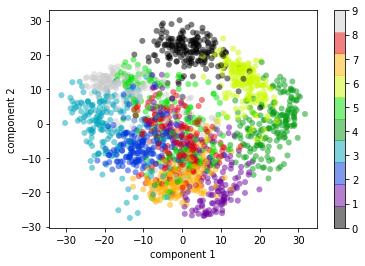

In [3]:
#  Plot the two principle components
plt.scatter(projected[:, 0], projected[:, 1],
            c=digits.target, edgecolor='none', alpha=0.5,
            cmap=plt.cm.get_cmap('nipy_spectral',10))
plt.xlabel('component 1')
plt.ylabel('component 2')
plt.colorbar()
plt.show()

<br><br>

Recall what these components mean: the full data is a 64-dimensional point cloud, and these points are the projection of each data point along the directions with the largest variance. 

Essentially, we have found the optimal stretch and rotation in 64-dimensional space that allows us to see the layout of the digits in two dimensions, and have done this in an unsupervised manner—that is, without reference to the labels.

<br><br><br><br><br><br><br><br><br><br><br><br>

### Choosing the number of components

A vital part of using PCA in practice is the ability to estimate how many components are needed to describe the data.

This can be determined by looking at the cumulative explained variance ratio as a function of the number of components:


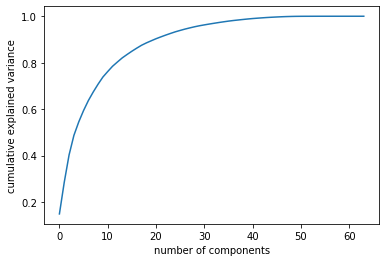

In [4]:
pca = PCA().fit(digits.data)
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

This curve quantifies how much of the total, 64-dimensional variance is contained within the first N components. 

For example, we see that with the digits the first 10 components contain approximately 75% of the variance, while you need around 50 components to describe close to 100% of the variance.

Here we see that our two-dimensional projection loses a lot of information (as measured by the explained variance) and that we'd need about 20 components to retain 90% of the variance. 

Looking at this plot for a high-dimensional dataset can help you understand the level of redundancy present in multiple observations.

<br><br><br><br><br><br><br><br><br><br><br><br>

### PCA as Noise Filtering

PCA can also be used as a filtering approach for noisy data. 

The idea is this: any components with variance much larger than the effect of the noise should be relatively unaffected by the noise. 

So if you reconstruct the data using just the largest subset of principal components, you should be preferentially keeping the signal and throwing out the noise.

Let's see how this looks with the digits data. First we will plot several of the input noise-free data:


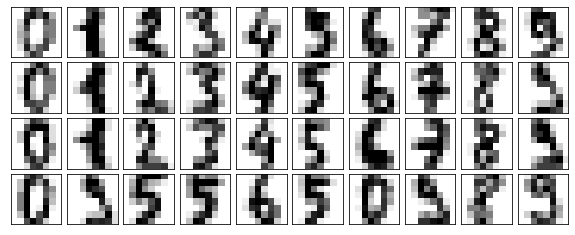

In [5]:
#  show some digits
def plot_digits(data):
    fig, axes = plt.subplots(4, 10, figsize=(10, 4),
                             subplot_kw={'xticks':[], 'yticks':[]},
                             gridspec_kw=dict(hspace=0.1, wspace=0.1))
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8, 8),
                  cmap='binary', interpolation='nearest',
                  clim=(0, 16))
plot_digits(digits.data)


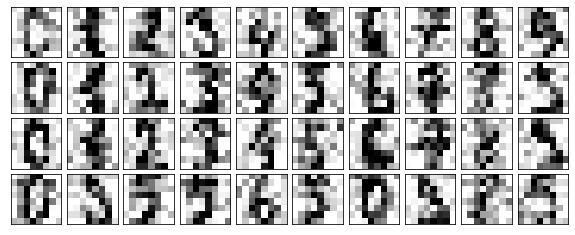

In [6]:
#  add some noise
np.random.seed(42)
noisy = np.random.normal(digits.data, 4)
plot_digits(noisy)

It's clear by eye that the images are noisy, and contain spurious pixels. Let's train a PCA on the noisy data, requesting that the projection preserve 50% of the variance:

<br><br><br><br><br><br><br><br><br><br><br><br>


In [9]:
#  how many components constitue 50% of the variance in the noisy set?
pca = PCA(0.50).fit(noisy)
print('\nNumer of components:', pca.n_components_)

#  check this
pca2 = PCA(n_components=5)
pca2.fit(noisy)
print('\nExpained Variance Ratio:', round(sum(pca2.explained_variance_ratio_),2))


Numer of components: 12

Expained Variance Ratio: 0.33


<br><br><br><br>

Here 50% of the variance amounts to 12 principal components of the noisy digits

Now we compute these components, and then use the inverse of the transform to reconstruct the filtered digits

<br><br>

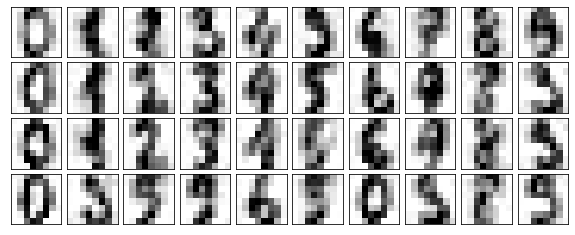

In [8]:
#  use the 12 components
components = pca.transform(noisy)
filtered = pca.inverse_transform(components)
plot_digits(filtered)


<br><br><br><br><br><br><br><br><br><br><br><br>

###  Summary

This signal preserving/noise filtering property makes PCA a very useful feature selection routine—for example, rather than training a classifier on very high-dimensional data, you might instead train the classifier on the lower-dimensional representation, which will automatically serve to filter out random noise in the inputs.

<br><br><br><br><br><br><br><br><br><br><br><br>


#  Homework

<br>
<b>

1.  Repeat the digits example using 5 componets.  How much of the variance is explained?<br><br>

2.  Repeat the digits example using 20 components.  How much of the variance is explained?<br><br>

3.  Repeat the digits example using 40 components.  How much of the variance is explained?<br><br>

4.  Describe the results that you obtain.<br><br>

</b>